<h1><center>Emoji'On : Reconnaissance des émotions</center></h1>
<h2><center>Part 1 : Exploratory Data Analysis</center></h2>
<center><img src="https://simplonline.co/_next/image?url=https%3A%2F%2Fsimplonline-v3-prod.s3.eu-west-3.amazonaws.com%2Fmedia%2Fimage%2Fjpg%2F32cf5db1-69d0-4e21-8dec-710068e7a355.jpg&w=1280&q=75" alt="iIllustration" title="title"  style="object-fit:cover; width:800px; height:250px;"/></center>

> __*Created by Charley lebarbier*__

## Objectives :  
*Réaliser une application pour placer des émojis sur le visage de personnes détectés dans une vidéo en fonction de leur émotion.*  

## Livrables :  

- Notebook cohérent sur :  
    - l'analyse, 
    - la préparation des données, la création et l'entrainement du/des modèles et visualisation des performances  
</br>
- Application fonctionnelle

-----------------
-----------------

In [3]:
# -- General Import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# -- Options
plt.style.use('fivethirtyeight')
sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

%matplotlib inline

## Dataset loading

In [4]:
df = pd.read_csv('../data/fer2013.csv')

## Data Visualization

In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [8]:
print("Valeurs manquantes :")
df.isna().isnull().sum()

Valeurs manquantes :


emotion    0
pixels     0
Usage      0
dtype: int64

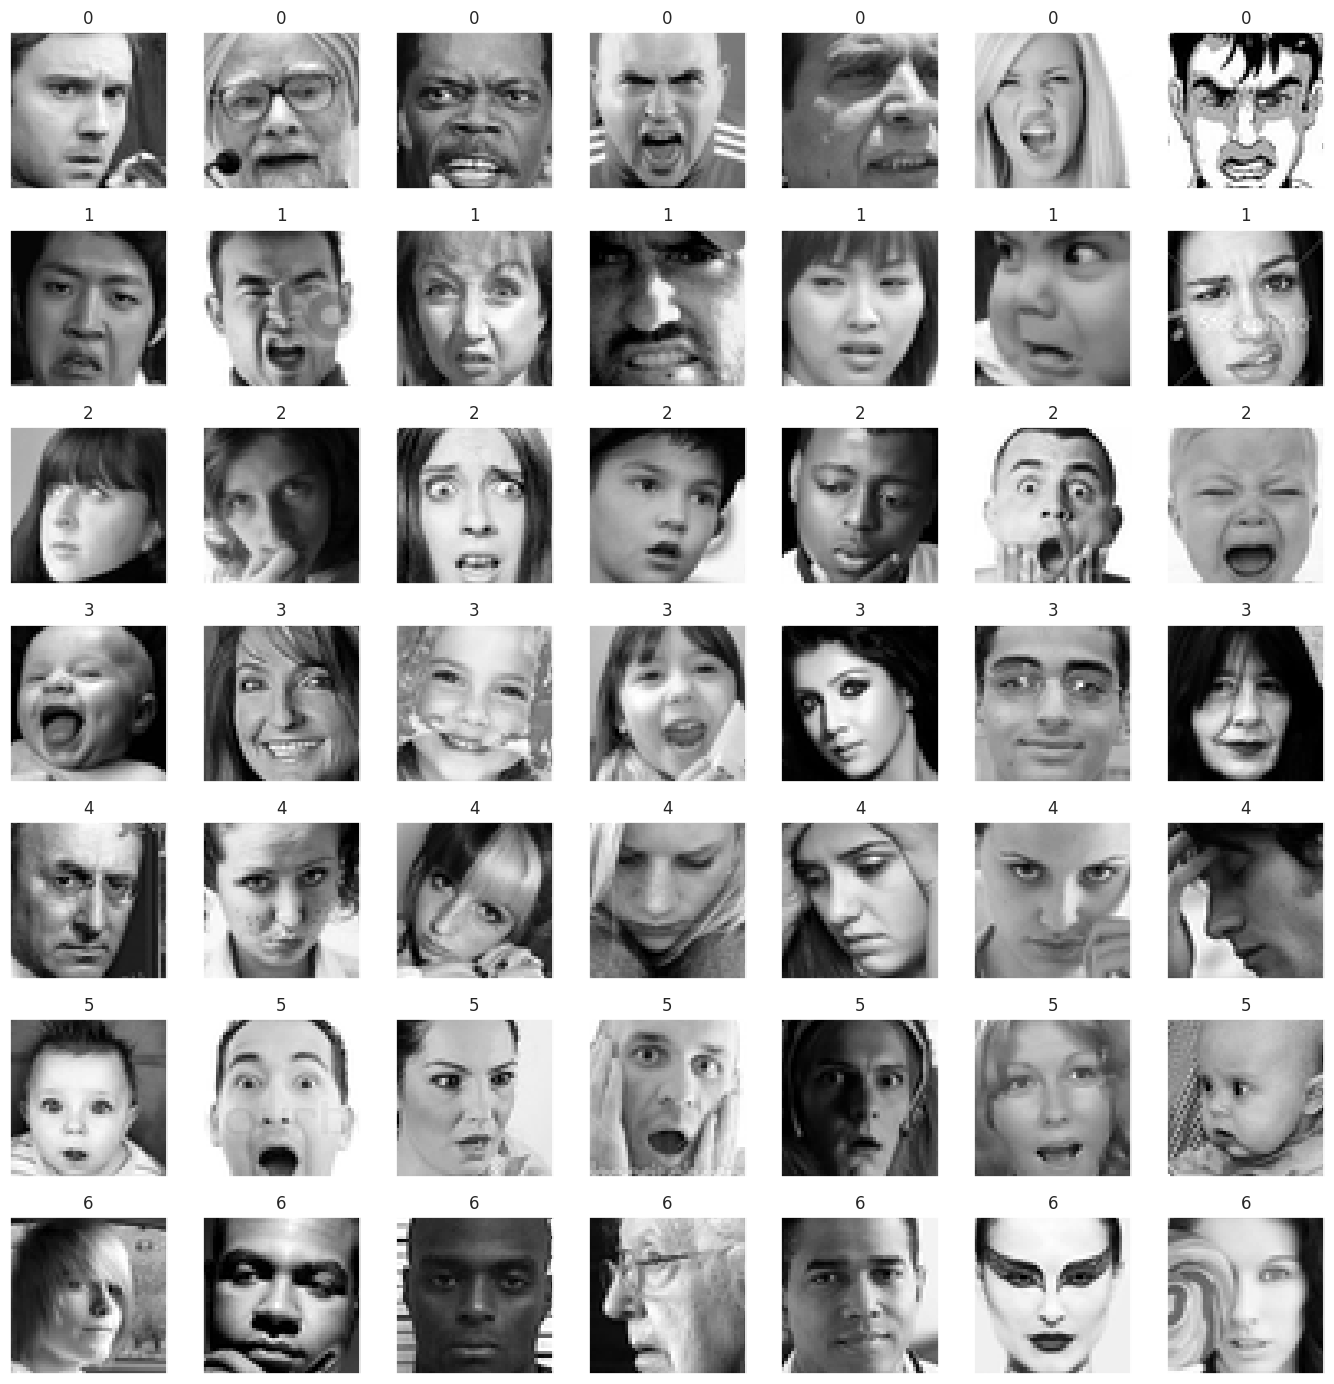

In [10]:
# -- Display a sample of images inside FER2013 to know the emotion encoding

fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(str(df[df.emotion==label].emotion.iloc[k]))
        plt.tight_layout()

Nous pouvons dorénavant savoir comment est encodé le dataset au niveau des émotions.  

In [11]:
emotions = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprised",
    6: "Neutral"
}

df['emotion name'] = df['emotion'].map(emotions)

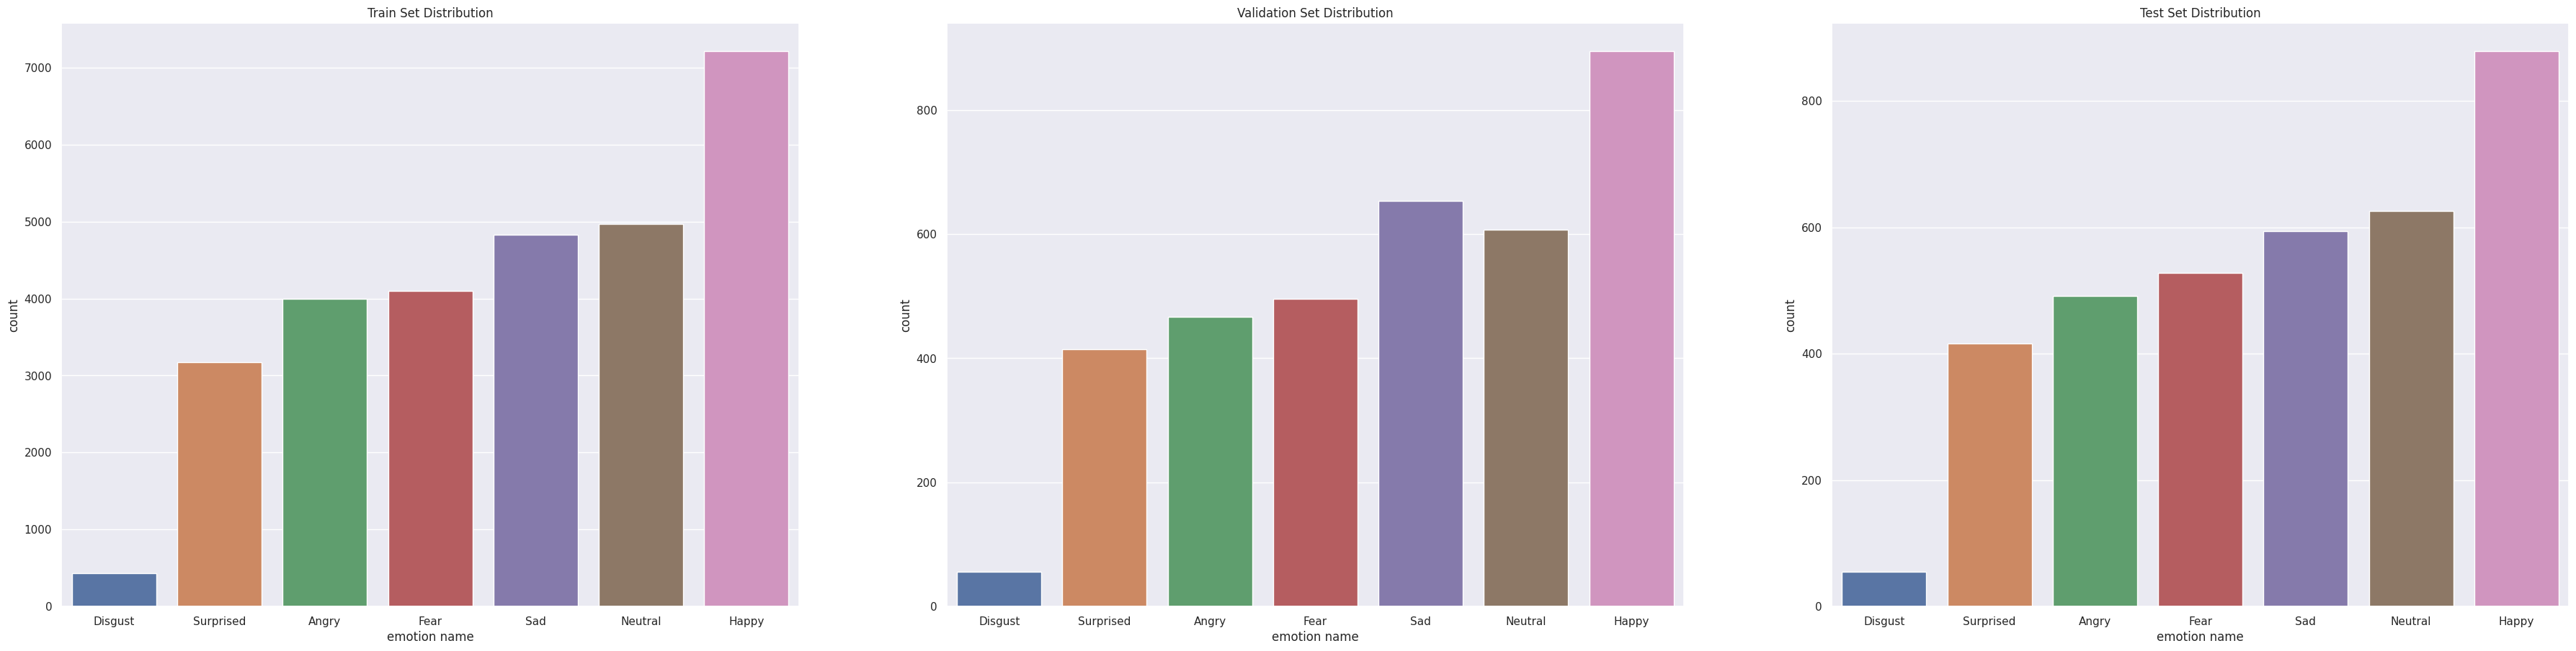

In [17]:
# -- Get values for each category
train_values = df[df['Usage'] == 'Training']
validation_values = df[df['Usage'] == 'PublicTest']
test_values = df[df['Usage'] == 'PrivateTest']


# -- Visualization
fig, ax = plt.subplots(1, 3, figsize=(40, 10))

ax[0].set_title('Train Set Distribution')
sns.countplot(data=train_values, x="emotion name", ax=ax[0],
                order = test_values['emotion name'].value_counts(ascending=True).index)

ax[1].set_title('Validation Set Distribution')
sns.countplot(data=validation_values, x="emotion name", ax=ax[1],
                order=test_values['emotion name'].value_counts(ascending=True).index)

ax[2].set_title('Test Set Distribution')
sns.countplot(data=test_values, x="emotion name", ax=ax[2],
                order=test_values['emotion name'].value_counts(ascending=True).index)

plt.show()

In [12]:
total_emotion = df.groupby(['emotion name', 'Usage'])['pixels'].count().to_frame()

total_emotion

pixels
emotion name Usage              
Angry        PrivateTest     491
             PublicTest      467
             Training       3995
Disgust      PrivateTest      55
             PublicTest       56
             Training        436
Fear         PrivateTest     528
             PublicTest      496
             Training       4097
Happy        PrivateTest     879
             PublicTest      895
             Training       7215
Neutral      PrivateTest     626
             PublicTest      607
             Training       4965
Sad          PrivateTest     594
             PublicTest      653
             Training       4830
Surprised    PrivateTest     416
             PublicTest      415
             Training       3171

-----------------------------
-----------------------------

## Conclusion  

La data visualization nous permet de constater trois éléments :  
- 1- La répartition est grossièrement égale sur 5 des 7 catégories d'émotions, cad : Angry , Fear , Neutral, Sad et Surprise ;  

- 2- La catégorie 'Happy' est sur-représentée ;  

- 3- La catégorie 'Disgust' est sous-représentée, avec respectivement : 436 images pour le Train_set, 56 pour le validation_set et 55 pour le Test_set

</br>
Nous pouvons par la suite appliquer une stratégies de Data Augmentation, sur cette dernière catégorie, afin de renforcer l'apprentissage. 